In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [243]:
df_trans = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name = 'Transactions', header = 1, skiprows = 0, parse_dates = [12])
df_new_customer_list = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name='NewCustomerList', header = 1, skiprows = 0)
df_customer_demographics = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name='CustomerDemographic', header = 1, skiprows = 0)
df_customer_address = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name= 'CustomerAddress', header = 1, skiprows = 0)

/tmp/ipykernel_6024/2306817503.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_new_customer_list = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name='NewCustomerList', header = 1, skiprows = 0)
/tmp/ipykernel_6024/2306817503.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_customer_demographics = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name='CustomerDemographic', header = 1, skiprows = 0)


In [244]:
df_trans.shape

(20000, 13)

In [245]:
now = pd.Timestamp('now')
df_customer_demographics['DOB'] = pd.to_datetime(df_customer_demographics['DOB'], format='%m%d%y')    # 1
df_customer_demographics['DOB'] = df_customer_demographics['DOB'].where(df_customer_demographics['DOB'] < now, df_customer_demographics['DOB'] -  np.timedelta64(100, 'Y'))   # 2
df_customer_demographics['age'] = (now - df_customer_demographics['DOB']).astype('<m8[Y]')    # 3
df_customer_demographics['age'] -= 5

In [246]:
df_trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226


In [247]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [248]:
df_trans.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000


In [249]:
df_trans.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [250]:
df_trans['transaction_date'].max()

Timestamp('2017-12-30 00:00:00')

In [251]:
df_trans['product_first_sold_date'].sort_values()

13882    33259
13411    33259
1548     33259
11494    33259
10036    33259
         ...  
19340      NaN
19383      NaN
19793      NaN
19859      NaN
19871      NaN
Name: product_first_sold_date, Length: 20000, dtype: object

In [252]:
df_trans['product_first_sold_date'].value_counts(ascending=True)

34586    162
37659    163
41922    166
42404    168
41848    169
        ... 
38216    220
39880    222
37823    227
41064    229
33879    234
Name: product_first_sold_date, Length: 100, dtype: int64

In [254]:
# df_trans['diff_time'] =  df_trans['transaction_date'] - df_trans['product_first_sold_date'] 

In [255]:
df_trans['diff_time'].max()

KeyError: 'diff_time'

In [ ]:
# df_trans.drop(df_trans['diff_time'], axis = 1, inplace = True)

In [ ]:
df_trans['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [256]:
df_trans['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [257]:
df_trans['product_class'].value_counts(dropna = False)

medium    13826
high       3013
low        2964
NaN         197
Name: product_class, dtype: int64

In [258]:
df_trans['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [259]:
df_trans.drop_duplicates(inplace = True)

In [260]:
df_trans.shape

(20000, 13)

In [261]:
df_trans['profit'] = (df_trans['list_price'] - df_trans['standard_cost'])*100/df_trans['standard_cost']

In [262]:
df_trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245,33.327117
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701,437.763550
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361,620.774054
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145,214.473891
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226,148.816034


In [263]:
df_trans.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
profit                     197
dtype: int64

In [264]:
df_new_customer_list.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,0.741750,0.832570,0.935724,0.864437,498.819000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,0.203532,0.245927,0.292172,0.278420,288.810997,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,0.400000,0.400000,0.400000,0.340000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,0.570000,0.625000,0.690000,0.648125,250.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,0.730000,0.812500,0.910000,0.846875,500.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,0.920000,1.020000,1.150000,1.062500,750.250000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1.100000,1.375000,1.718750,1.718750,1000.000000,1000.000000,1.718750


In [265]:
df_new_customer_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [266]:
df_new_customer_list.drop(['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'], axis = 1, inplace = True)

In [267]:
df_new_customer_list.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [268]:
df_new_customer_list.drop_duplicates()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357000


In [269]:
df_new_customer_list['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [270]:
df_new_customer_list['gender'].replace(to_replace= 'U', value = np.nan, inplace=True)

In [271]:
df_new_customer_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               983 non-null    object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [272]:
df_new_customer_list.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1.718750


In [273]:
df_new_customer_list['country'].unique()

array(['Australia'], dtype=object)

In [274]:
df_new_customer_list['state'].unique()

array(['QLD', 'NSW', 'VIC'], dtype=object)

In [275]:
df_new_customer_list['job_industry_category'].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

In [276]:
df_customer_demographics['deceased_indicator'].value_counts()

N    3998
Y       2
Name: deceased_indicator, dtype: int64

In [277]:
df_customer_demographics.shape

(4000, 13)

In [278]:
df_customer_demographics.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,age
count,4000.000000,4000.000000,3913.000000,3913.000000
mean,2000.500000,48.890000,10.657041,40.184769
std,1154.844867,28.715005,5.660146,12.797017
min,1.000000,0.000000,1.000000,16.000000
25%,1000.750000,24.000000,6.000000,31.000000
50%,2000.500000,48.000000,11.000000,40.000000
75%,3000.250000,73.000000,15.000000,50.000000
max,4000.000000,99.000000,22.000000,174.000000


In [279]:
df_customer_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [280]:
df_new_customer_list.shape

(1000, 18)

In [281]:
df_customer_demographics['DOB'].min()
df_customer_demographics['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [282]:
df_customer_demographics['gender'].replace({'Male':'M','Female':'F','Femal':'F','U':np.nan},inplace=True)

In [283]:
df_customer_demographics.drop_duplicates()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,64.0
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,37.0
2,3,Arlin,Dearle,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,64.0
3,4,Talbot,NaN,M,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,56.0
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,F,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0,42.0
3996,3997,Blanch,Nisuis,F,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0,16.0
3997,3998,Sarene,Woolley,NaN,60,NaT,Assistant Manager,IT,High Net Worth,N,No,NaN,NaN
3998,3999,Patrizius,NaN,M,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Yes,10.0,44.0


In [284]:
df_customer_demographics['job_industry_category'].unique()

array(['Health', 'Financial Services', 'Property', 'IT', nan, 'Retail',
       'Argiculture', 'Manufacturing', 'Telecommunications',
       'Entertainment'], dtype=object)

In [285]:
df_customer_demographics['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [286]:
df_customer_demographics['gender'].unique()

array(['F', 'M', nan], dtype=object)

In [287]:
df_new_customer_list['gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [288]:
df_customer_demographics['job_title'].unique()

array(['Executive Secretary', 'Administrative Officer',
       'Recruiting Manager', nan, 'Senior Editor', 'Media Manager I',
       'Business Systems Development Analyst', 'Senior Quality Engineer',
       'Nuclear Power Engineer', 'Developer I', 'Account Executive',
       'Junior Executive', 'Media Manager IV', 'Sales Associate',
       'Professor', 'Geological Engineer', 'Project Manager',
       'Safety Technician I', 'Research Assistant I',
       'Accounting Assistant III', 'Editor', 'Research Nurse',
       'Safety Technician III', 'Staff Accountant III', 'Legal Assistant',
       'Product Engineer', 'Information Systems Manager',
       'VP Quality Control', 'Social Worker', 'Senior Cost Accountant',
       'Assistant Media Planner', 'Payment Adjustment Coordinator',
       'Food Chemist', 'Accountant III', 'Director of Sales',
       'Senior Financial Analyst', 'Registered Nurse',
       'Biostatistician II', 'Computer Systems Analyst II',
       'Software Test Engineer II', 

In [289]:
df_customer_address.shape

(3999, 6)

In [290]:
df_customer_address.duplicated().unique()

array([False])

In [291]:
df_customer_address.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [292]:
df_customer_address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [293]:
df_customer_address['country'].unique()

array(['Australia'], dtype=object)

In [294]:
df_customer_address['state'].unique()
df_customer_address['state'].replace({'New South Wales':'NSW','Victoria':'VIC'},inplace=True
                                     )

In [295]:
df_customer_address['property_valuation'].value_counts()

9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1     154
2     143
Name: property_valuation, dtype: int64

In [296]:
df_customer = df_customer_demographics.merge(df_customer_address, on = 'customer_id')

In [297]:
df_customer.shape

(3996, 18)

In [298]:
df = df_customer_demographics.merge(df_customer_address, how = 'outer', on = 'customer_id')

In [299]:
df.shape

(4003, 18)

In [300]:
df.isnull().sum()

customer_id                              0
first_name                               3
last_name                              128
gender                                  91
past_3_years_bike_related_purchases      3
DOB                                     90
job_title                              509
job_industry_category                  659
wealth_segment                           3
deceased_indicator                       3
owns_car                                 3
tenure                                  90
age                                     90
address                                  4
postcode                                 4
state                                    4
country                                  4
property_valuation                       4
dtype: int64

In [301]:
merged_df = df_trans.merge(df, on='customer_id')

In [302]:
merged_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment,deceased_indicator,owns_car,tenure,age,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,Yes,10.0,63.0,984 Hoepker Court,3064.0,VIC,Australia,6.0
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Mass Customer,N,Yes,10.0,63.0,984 Hoepker Court,3064.0,VIC,Australia,6.0
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,Yes,10.0,63.0,984 Hoepker Court,3064.0,VIC,Australia,6.0
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Mass Customer,N,Yes,10.0,39.0,4 Shopko Circle,2196.0,NSW,Australia,5.0
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Mass Customer,N,Yes,10.0,39.0,4 Shopko Circle,2196.0,NSW,Australia,5.0


In [303]:
merged_df[['age','tenure','postcode','wealth_segment','past_3_years_bike_related_purchases']].corr()

/tmp/ipykernel_6024/3753377420.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df[['age','tenure','postcode','wealth_segment','past_3_years_bike_related_purchases']].corr()


,age,tenure,postcode,past_3_years_bike_related_purchases
age,1.000000,0.439186,-0.011859,-0.037133
tenure,0.439186,1.000000,0.011839,-0.020642
postcode,-0.011859,0.011839,1.000000,-0.017359
past_3_years_bike_related_purchases,-0.037133,-0.020642,-0.017359,1.000000


<Axes: xlabel='wealth_segment', ylabel='past_3_years_bike_related_purchases'>

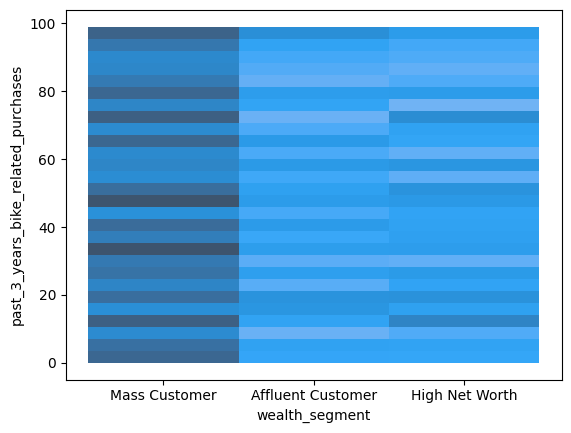

In [304]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(merged_df,x='wealth_segment', y= 'past_3_years_bike_related_purchases')

<Axes: xlabel='wealth_segment', ylabel='Count'>

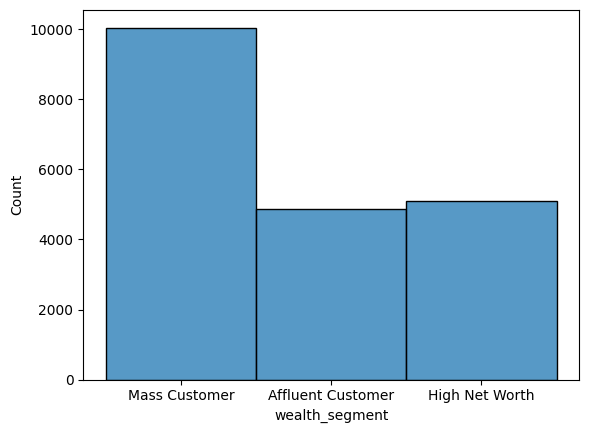

In [305]:
sns.histplot(merged_df,x='wealth_segment')

In [306]:
wealth_segment_profit  = merged_df.groupby('wealth_segment')['profit'].sum()
state_profit = merged_df.groupby('state')['profit'].sum()
car_profit = merged_df.groupby('owns_car')['profit'].sum()
gender_profit = merged_df.groupby('gender')['profit'].sum()


In [307]:
def getAgeGroup(age):
    if(age is np.nan):
        return 'unknown'
    if age < 18:
        return "below18"
    elif 18 <= age < 30:
        return "18-30"
    elif 30 <= age < 45:
        return "30-45"
    elif 45 <= age < 60:
        return "45-60"
    else:
        return "60+"
merged_df['age_group'] = merged_df['age'].apply(getAgeGroup)

In [308]:
age_group_profit = merged_df.groupby('age_group')['profit'].sum()


In [309]:
car_profit

owns_car
No     3.333940e+06
Yes    2.928841e+06
Name: profit, dtype: float64

In [310]:
gender_profit

gender
F    3.176468e+06
M    2.928692e+06
Name: profit, dtype: float64

In [311]:
age_group_profit

age_group
18-30      1.304322e+06
30-45      2.587416e+06
45-60      1.610679e+06
60+        5.980401e+05
below18    1.623224e+05
Name: profit, dtype: float64

In [312]:
merged_df[['age','tenure','profit','past_3_years_bike_related_purchases','property_valuation']].corr()

,age,tenure,profit,past_3_years_bike_related_purchases,property_valuation
age,1.000000,0.439186,-0.007131,-0.037133,0.014164
tenure,0.439186,1.000000,0.004782,-0.020642,-0.019417
profit,-0.007131,0.004782,1.000000,0.004286,-0.010312
past_3_years_bike_related_purchases,-0.037133,-0.020642,0.004286,1.000000,0.012140
property_valuation,0.014164,-0.019417,-0.010312,0.012140,1.000000


In [313]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 0 to 19996
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19997 non-null  int64         
 1   product_id                           19997 non-null  int64         
 2   customer_id                          19997 non-null  int64         
 3   transaction_date                     19997 non-null  datetime64[ns]
 4   online_order                         19637 non-null  float64       
 5   order_status                         19997 non-null  object        
 6   brand                                19800 non-null  object        
 7   product_line                         19800 non-null  object        
 8   product_class                        19800 non-null  object        
 9   product_size                         19800 non-null  object        
 10  list_price

In [319]:
sns.countplot(merged_df['brand'].fillna('unknown'), merged_df['wealth_segment'].fillna('unknown'))

TypeError: countplot() takes from 0 to 1 positional arguments but 2 were given

In [326]:
t1 = merged_df.groupby(['wealth_segment','brand'])
t1['brand'].count()

wealth_segment     brand         
Affluent Customer  Giant Bicycles     827
                   Norco Bicycles     652
                   OHM Cycles         750
                   Solex             1040
                   Trek Bicycles      764
                   WeareA2B           777
High Net Worth     Giant Bicycles     873
                   Norco Bicycles     777
                   OHM Cycles         751
                   Solex             1071
                   Trek Bicycles      733
                   WeareA2B           841
Mass Customer      Giant Bicycles    1612
                   Norco Bicycles    1480
                   OHM Cycles        1541
                   Solex             2141
                   Trek Bicycles     1493
                   WeareA2B          1677
Name: brand, dtype: int64

In [336]:
t2 = merged_df.groupby(['product_class','age_group','brand'])
t2['brand'].count().unstack()

brand                    Giant Bicycles  Norco Bicycles  OHM Cycles   Solex  \
product_class age_group                                                       
high          18-30               135.0           137.0       147.0   127.0   
              30-45               348.0           223.0       345.0   243.0   
              45-60               203.0           130.0       211.0   135.0   
              60+                  88.0            65.0        53.0    53.0   
              below18              11.0            11.0        15.0     8.0   
low           18-30                52.0           127.0       142.0    72.0   
              30-45                86.0           270.0       241.0   187.0   
              45-60                40.0           158.0       168.0    97.0   
              60+                  17.0            63.0        50.0    45.0   
              below18               1.0            14.0         8.0     9.0   
medium        18-30               474.0           347.0       339.0   714.0   
              30-45               946.0           752.0       722.0  1355.0   
              45-60               637.0           411.0       422.0   868.0   
              60+                 227.0           170.0       143.0   280.0   
              below18              47.0            31.0        36.0    59.0   

brand                    Trek Bicycles  WeareA2B  
product_class age_group                           
high          18-30               63.0       NaN  
              30-45              137.0       NaN  
              45-60               84.0       NaN  
              60+                 37.0       NaN  
              below18              4.0       NaN  
low           18-30              175.0      69.0  
              30-45              348.0     145.0  
              45-60              186.0      82.0  
              60+                 62.0      25.0  
              below18             15.0      10.0  
medium        18-30              392.0     615.0  
              30-45              794.0    1223.0  
              45-60              505.0     795.0  
              60+                165.0     284.0  
              below18             23.0      47.0

In [332]:
merged_df['age_group'].value_counts()

30-45      8445
45-60      5176
18-30      4171
60+        1854
below18     351
Name: age_group, dtype: int64

In [358]:
merged_df.groupby(['brand','product_class','product_line']).head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,deceased_indicator,owns_car,tenure,age,address,postcode,state,country,property_valuation,age_group
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,N,Yes,10.0,63.0,984 Hoepker Court,3064.0,VIC,Australia,6.0,60+
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,N,Yes,10.0,63.0,984 Hoepker Court,3064.0,VIC,Australia,6.0,60+
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,N,Yes,10.0,63.0,984 Hoepker Court,3064.0,VIC,Australia,6.0,60+
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,N,Yes,10.0,39.0,4 Shopko Circle,2196.0,NSW,Australia,5.0,30-45
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,N,Yes,10.0,39.0,4 Shopko Circle,2196.0,NSW,Australia,5.0,30-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,6380,96,1335,2017-11-08,0.0,Approved,WeareA2B,Road,low,small,...,N,Yes,3.0,20.0,4 Sycamore Pass,3977.0,VIC,Australia,5.0,18-30
745,114,75,455,2017-10-24,1.0,Approved,Giant Bicycles,Touring,medium,large,...,N,Yes,5.0,26.0,6 Mariners Cove Center,2233.0,NSW,Australia,10.0,18-30
792,4900,66,50,2017-07-24,0.0,Approved,Giant Bicycles,Road,low,small,...,N,Yes,16.0,37.0,957 Veith Junction,2047.0,NSW,Australia,10.0,30-45
940,4274,66,3261,2017-10-15,1.0,Approved,Giant Bicycles,Road,low,small,...,N,Yes,5.0,43.0,4591 Del Sol Court,2745.0,NSW,Australia,8.0,30-45


TypeError: unhashable type: 'Series'